# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
from IPython.core.pylabtools import figsize

In [4]:
athletes = pd.read_csv("athletes.csv")

In [8]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [11]:
# Sua análise começa aqui.
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [13]:
athletes.head(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [16]:
athletes.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

In [36]:
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

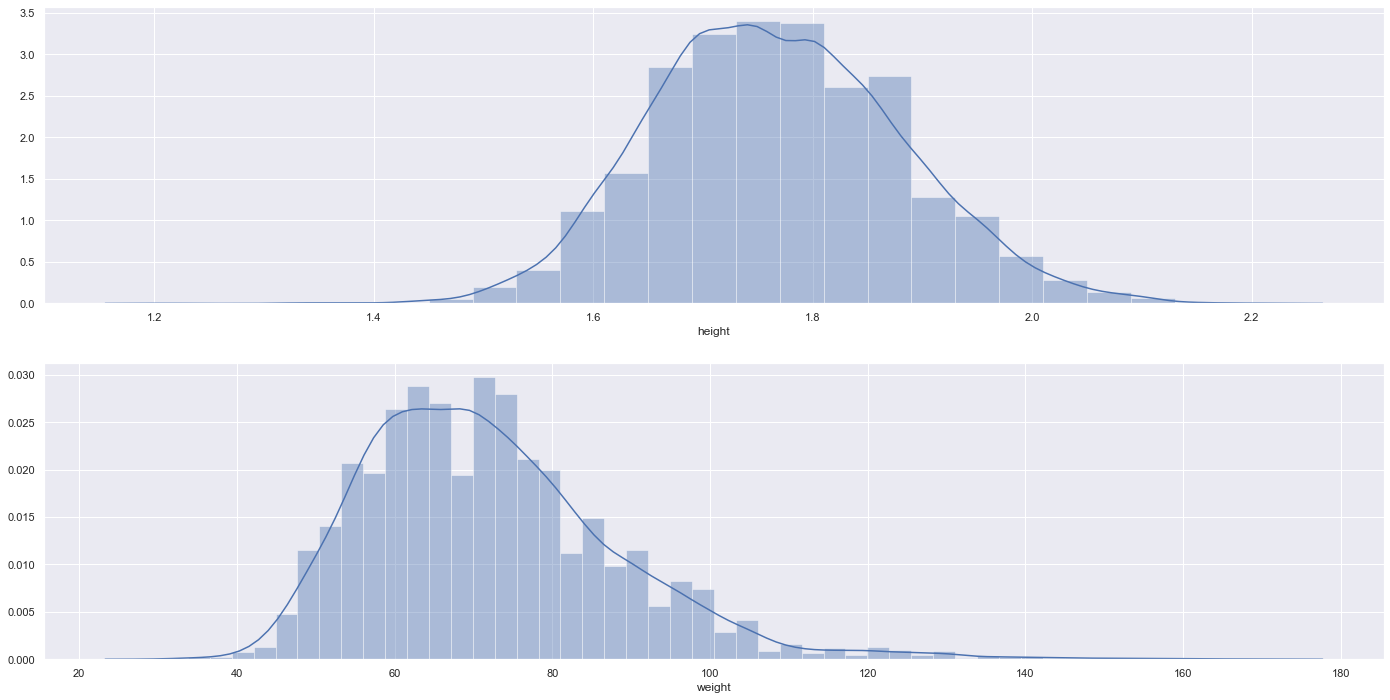

In [69]:
fig, axs = plt.subplots(2,figsize=(24, 12))
sns.distplot(athletes['height'], ax=axs[0], bins=25)
sns.distplot(athletes['weight'], ax=axs[1])


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).


## P-value

https://www.youtube.com/watch?v=vemZtEM63GY

https://www.youtube.com/watch?v=99ag4jdSeok

O P-valor ou valor de probabilidade  obtem o teste do resultado do resultado atual observado, assuminod que o hopotese nula é a correta (H0) <br>
Essa quantidade que nos usamos para interpretar ou quantificar o resultado do teste podendo rejeitar ou não rejeitar a hipotese nula.  <br>
Isso é feito comparando o P-Value  com um valor de confiança chamado de Significante level (denotado como α ou alfa).<br><br>



## Interpretação P-value

O valor de significancia comumente usado é de 0,05. <br>
Um nível de significância de 0,05 indica um risco de 5% de concluir que os dados não seguem a distribuição normal quando eles realmente a seguem. <br><br>

Se o valor de p for menor ou igual ao nível de significância, você deve rejeitar a hipótese nula e concluir que os seus dados não seguem a distribuição normal.<br>
<b>Valor de p ≤ α: Os dados não seguem uma distribuição normal (Rejeite H0)</b><br>
Conclusão: A comparação entre os grupos são diferentes por fatores aleatórios (Falso Positivo)

Se o valor de p for maior do que o nível de significância, você não deve rejeitar a hipótese nula. Não há evidências suficientes para concluir que os dados não seguem uma distribuição normal.<br>
<b>Valor de p > α: Não é possível concluir que os dados não seguem uma distribuição normal (não deve rejeitar H0)</b><br>
Conclusão: A comparação entre os grupos são iguais, pode rejeitar H0.



## Alpha or Significance Value

A common value used for alpha is 5% or 0.05. A smaller alpha value suggests a more robust interpretation of the null hypothesis, such as 1% or 0.1%.
The p-value is compared to the pre-chosen alpha value. A result is statistically significant when the p-value is less than alpha. This signifies a change was detected: that the default hypothesis can be rejected.

If p-value > alpha: Fail to reject the null hypothesis (i.e. not significant result).<br>
If p-value <= alpha: Reject the null hypothesis (i.e. significant result).

For example, if we were performing a test of whether a data sample was normal and we calculated a p-value of .07, we could state something like:
The test found that the data sample was normal, failing to reject the null hypothesis at a 5% significance level.

In [112]:
def q1():
    return bool(sct.shapiro(get_sample(athletes, 'height', 3000))[1] > 0.05)
    pass

In [113]:
q1()

False

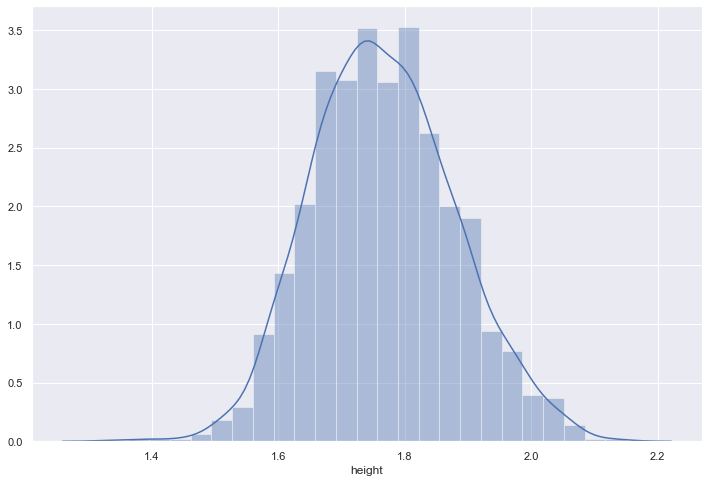

In [75]:
sns.distplot(get_sample(athletes, 'height', 3000),bins=25)

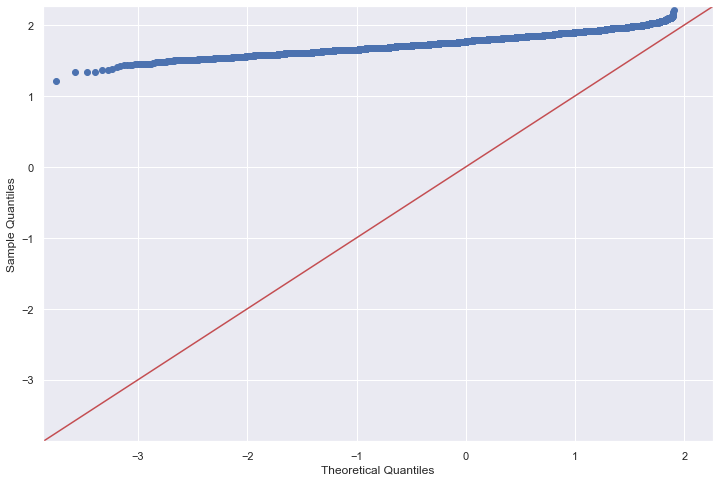

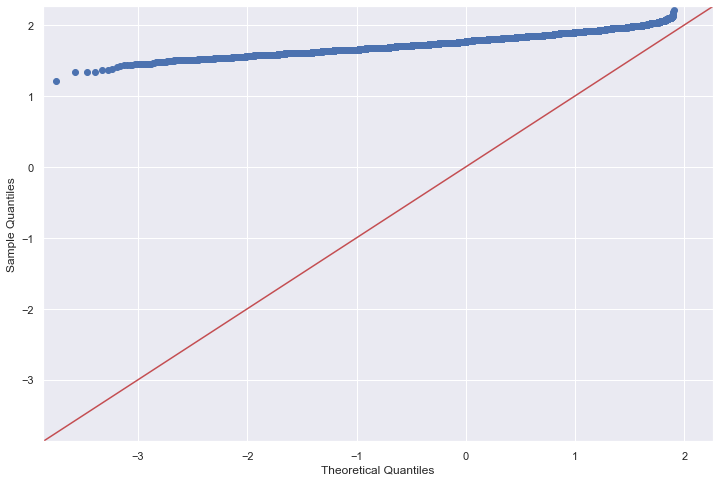

In [81]:
sm.qqplot(athletes['height'], line ='45') 

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [91]:
def q2():
    return bool(sct.jarque_bera(get_sample(athletes, 'height', 3000))[1] > 0.05)
    pass

In [92]:
q2()

True

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [96]:
def q3():
    return bool(sct.normaltest(get_sample(athletes, 'weight', 3000))[1] > 0.05)
    pass

In [97]:
q3()

True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [101]:
def q4():
    sample_log = np.log(get_sample(athletes, 'weight', 3000))
    return bool(sct.normaltest(sample_log)[1] > 0.05)
    pass

In [102]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [104]:
bra = athletes.query('nationality == "BRA"')
usa = athletes.query('nationality == "USA"')
can = athletes.query('nationality == "CAN"')

In [114]:
def q5():
    return bool(sct.ttest_ind(bra.height,usa.height,equal_var=False,nan_policy="omit")[1] > 0.05)
    pass

In [120]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [117]:
def q6():
    return bool(sct.ttest_ind(bra.height,can.height,equal_var=False,nan_policy="omit")[1] > 0.05)
    pass

In [121]:
sct.ttest_ind(bra.height,can.height,equal_var=False,nan_policy="omit")

Ttest_indResult(statistic=0.6389304914365109, pvalue=0.5230827295440921)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [126]:
def q7():
    return float(round(sct.ttest_ind(usa.height,can.height,equal_var=False,nan_policy="omit")[1],8))
    pass

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?